In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/Amaan Khan/Downloads/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:/Users/Amaan Khan/Downloads/archive\emotions.csv
C:/Users/Amaan Khan/Downloads/archive\images\0\Anger.jpg
C:/Users/Amaan Khan/Downloads/archive\images\0\Contempt.jpg
C:/Users/Amaan Khan/Downloads/archive\images\0\Disgust.jpg
C:/Users/Amaan Khan/Downloads/archive\images\0\Fear.jpg
C:/Users/Amaan Khan/Downloads/archive\images\0\Happy.jpg
C:/Users/Amaan Khan/Downloads/archive\images\0\Neutral.jpg
C:/Users/Amaan Khan/Downloads/archive\images\0\Sad.jpg
C:/Users/Amaan Khan/Downloads/archive\images\0\Surprised.jpg
C:/Users/Amaan Khan/Downloads/archive\images\1\Anger.jpg
C:/Users/Amaan Khan/Downloads/archive\images\1\Contempt.jpg
C:/Users/Amaan Khan/Downloads/archive\images\1\Disgust.jpg
C:/Users/Amaan Khan/Downloads/archive\images\1\Fear.jpg
C:/Users/Amaan Khan/Downloads/archive\images\1\Happy.jpg
C:/Users/Amaan Khan/Downloads/archive\images\1\Neutral.jpg
C:/Users/Amaan Khan/Downloads/archive\images\1\Sad.jpg
C:/Users/Amaan Khan/Downloads/archive\images\1\Surprised.jpg
C:/Users/Amaan Khan/D

In [2]:
DATA_DIR = 'C:/Users/Amaan Khan/Downloads/archive/images'
EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']
IMG_SIZE = 48

In [3]:
def load_data():
    images = []
    labels = []
    
    for emotion_label, emotion in enumerate(EMOTIONS):
        # Get the directory for the current emotion
        emotion_dir = os.path.join(DATA_DIR, str(emotion_label))
        if os.path.isdir(emotion_dir):
            for img_file in os.listdir(emotion_dir):
                img_path = os.path.join(emotion_dir, img_file)
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                images.append(img_resized)
                labels.append(emotion_label)  # Assigning label based on index
        else:
            print(f"Directory not found for emotion {emotion}: {emotion_dir}")
        
    return np.array(images), np.array(labels)

# Load the data
images, labels = load_data()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data for CNN input
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

Number of images: 64
Shape of images array: (64, 48, 48)
Number of labels: 64


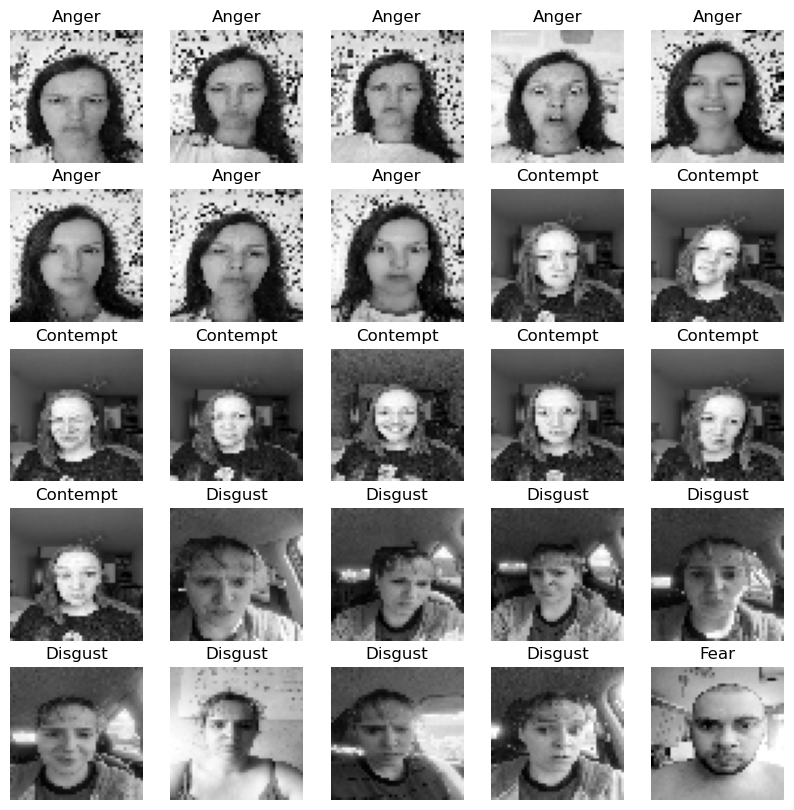

In [4]:
print("Number of images:", len(images))
print("Shape of images array:", images.shape)
print("Number of labels:", len(labels))

# Print sample images and their corresponding labels
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(EMOTIONS[labels[i]])
    plt.axis('off')
plt.show()


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(EMOTIONS), activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

C:\Users\Amaan Khan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 837ms/step - accuracy: 0.1436 - loss: 2.1046 - val_accuracy: 0.3077 - val_loss: 2.0910
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.4882 - loss: 2.0351 - val_accuracy: 0.0769 - val_loss: 2.0620
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.1436 - loss: 2.0058 - val_accuracy: 0.2308 - val_loss: 2.0386
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.2586 - loss: 1.9548 - val_accuracy: 0.3077 - val_loss: 1.9724
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.4203 - loss: 1.8480 - val_accuracy: 0.4615 - val_loss: 1.8452
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.5039 - loss: 1.6789 - val_accuracy: 0.5385 - val_loss: 1.5600
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.6789 - loss: 1.4657 - val_accuracy: 0.9231 - val_loss: 1.1780
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.8799 - loss: 1.1158 - val_accuracy: 0.8462 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 1.0000 - loss: 0.0093
Test accuracy: 1.0


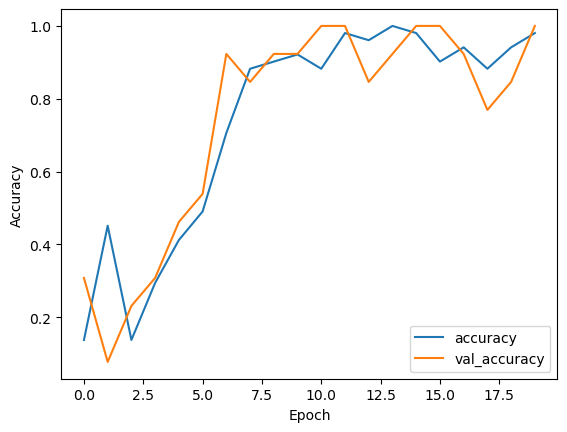

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [7]:
model.save('C:/Users/Amaan Khan/Downloads/emotion_detection_model_1.keras')

In [8]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('C:/Users/Amaan Khan/Downloads/emotion_detection_model_1.keras')

# Define function to preprocess input image
def preprocess_image(img_path):
    # Load the image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    # Normalize the pixel values
    img_normalized = img_resized / 255.0
    # Reshape the image for model input
    img_reshaped = img_normalized.reshape(1, IMG_SIZE, IMG_SIZE, 1)
    return img_reshaped

# Provide path to your input image
input_img_path = 'C:/Users/Amaan Khan/Downloads/archive/images/0/Anger.jpg'

# Preprocess the input image
input_img = preprocess_image(input_img_path)

# Make prediction using the loaded model
predictions = model.predict(input_img)

# Get the predicted emotion label
predicted_label = EMOTIONS[np.argmax(predictions)]

# Print the predicted label
print("Predicted emotion:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Predicted emotion: Anger


In [13]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('C:/Users/Amaan Khan/Downloads/emotion_detection_model_1.keras')

# Load the pre-trained face detection classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Define function to preprocess input image
def preprocess_image(img):
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Equalize histogram for better contrast
    img_eq = cv2.equalizeHist(img_gray)
    # Resize the image
    img_resized = cv2.resize(img_eq, (IMG_SIZE, IMG_SIZE))
    # Normalize the pixel values
    img_normalized = img_resized / 255.0
    # Reshape the image for model input
    img_reshaped = img_normalized.reshape(1, IMG_SIZE, IMG_SIZE, 1)
    return img_reshaped

# Define constants
IMG_SIZE = 48
# Map original emotions to new categories
EMOTIONS_MAPPING = {
    "Angry": "Negative",
    "Disgust": "Neutral",
    "Fear": "Negative",
    "Happy": "Positive",
    "Sad": "Negative",
    "Surprise": "Positive",
    "Neutral": "Neutral"
}

# Create a VideoCapture object to capture video from the webcam
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the webcam
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    # Iterate through the detected faces
    for (x, y, w, h) in faces:
        # Draw a green rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        # Crop the face region for emotion detection
        face_roi = frame[y:y+h, x:x+w]
        
        # Preprocess the face image for emotion detection
        input_img = preprocess_image(face_roi)
        
        # Make prediction using the loaded model
        predictions = model.predict(input_img)
        
        # Get the predicted emotion label
        max_prediction_index = np.argmax(predictions)
        predicted_emotion = EMOTIONS[max_prediction_index]
        
        # Map original emotion to new category
        predicted_category = EMOTIONS_MAPPING.get(predicted_emotion, "Neutral")
        
        # Display the predicted emotion label on the frame
        cv2.putText(frame, predicted_category, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    # Display the frame
    cv2.imshow('Emotion Detection', frame)
    
    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the VideoCapture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
